In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [43]:
f = open("pheno_n300_conti.phe")
lines = []
for line in f:
    lines.append(line.strip().split("\t"))
    
phe_conti300_df = pd.DataFrame(lines)
tmp_list = []
for i in range(len(phe_conti300_df)):
    tmp_list.append([phe_conti300_df.iloc[i,2], phe_conti300_df.iloc[i,3]])
    
conti_train_Y = []
for index in tmp_list:
    conti_train_Y.append(list(map(float, index)))
    
conti_train_Y = np.array(conti_train_Y)
fam_conti_train_Y = conti_train_Y[:, 0]
id_conti_train_Y = conti_train_Y[:, 1]
# conti_train_Y

In [44]:
f = open("pheno_n150_conti.phe")
lines = []
for line in f:
    lines.append(line.strip().split("\t"))
    
phe_conti150_df = pd.DataFrame(lines)
tmp_list = []
for i in range(len(phe_conti150_df)):
    tmp_list.append([phe_conti150_df.iloc[i,2], phe_conti150_df.iloc[i,3]])
    
conti_test_Y = []
for index in tmp_list:
    conti_test_Y.append(list(map(float, index)))

conti_test_Y = np.array(conti_test_Y)
fam_conti_test_Y = conti_test_Y[:, 0]
id_conti_test_Y = conti_test_Y[:, 1]
# conti_test_Y

In [45]:
f = open("pheno_n300_binary.phe")
lines = []
for line in f:
    lines.append(line.strip().split("\t"))

phe_bin300_df = pd.DataFrame(lines)
tmp_list = []
for i in range(len(phe_bin300_df)):
    tmp_list.append([phe_bin300_df.iloc[i,2], phe_bin300_df.iloc[i,3]])
    
bin_train_Y = []
for index in tmp_list:
    bin_train_Y.append(list(map(float, index)))

bin_train_Y = np.array(bin_train_Y)
fam_bin_train_Y = bin_train_Y[:, 0]
id_bin_train_Y = bin_train_Y[:, 1]
# bin_train_Y

In [46]:
f = open("pheno_n150_binary.phe")
lines = []
for line in f:
    lines.append(line.strip().split("\t"))

phe_bin150_df = pd.DataFrame(lines)
tmp_list = []
for i in range(len(phe_bin150_df)):
    tmp_list.append([phe_bin150_df.iloc[i,2], phe_bin150_df.iloc[i,3]])
    
bin_test_Y = []
for index in tmp_list:
    bin_test_Y.append(list(map(float, index)))

bin_test_Y = np.array(bin_test_Y)
fam_bin_test_Y = bin_test_Y[:, 0]
id_bin_test_Y = bin_test_Y[:, 1]
# bin_test_Y

In [47]:
f = open("sim_n300_p1000.mldose")
lines = []
for line in f:
    lines.append(line.strip().split("\t"))

tmp_list = []
for i in range(len(lines)):
    tmp_list.append(lines[i][2:])

train_X = []
for index in tmp_list:
    train_X.append(list(map(float, index)))

train_X = np.array(train_X)

In [48]:
f = open("sim_n150_p1000.mldose")
lines = []
for line in f:
    lines.append(line.strip().split("\t"))

tmp_list = []
for i in range(len(lines)):
    tmp_list.append(lines[i][2:])

test_X = []
for index in tmp_list:
    test_X.append(list(map(float, index)))

test_X = np.array(test_X)

In [8]:
def LeastSquareMethod(X, Y):
    x_bar = sum(X) / len(X)
    y_bar = sum(Y) / len(Y)
    
    a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y,X))])
    a /= sum([(x - x_bar) ** 2 for x in X])
    b = y_bar - a * x_bar
    print('slope : ', a, 'intercept : ', b)
    
    line_x = np.arange(min(X), max(X), 0.01)
    line_y = a * line_x + b
    
    plt.plot(line_x, line_y, 'r-')
    

C:\Users\ghdtk\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 2000)              2002000   
_________________________________________________________________
dense_233 (Dense)            (None, 1000)              2001000   
_________________________________________________________________
dense_234 (Dense)            (None, 500)               500500    
_________________________________________________________________
dense_235 (Dense)            (None, 1)                 501       
Total params: 4,504,001
Trainable params: 4,504,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
23/23 [==============================] - 1s 20ms/step - loss: 92353.6719 - val_loss: 1041.5760
Epoch 2/25
23/23 [==============================] - 0s 16ms/step - loss: 177.3322 - val_loss: 33.7830
Epoch 3/25
23/23 [===============

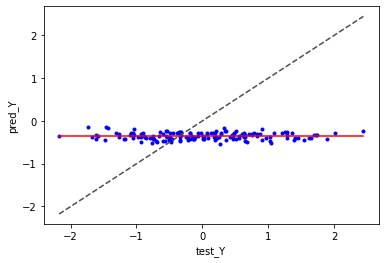

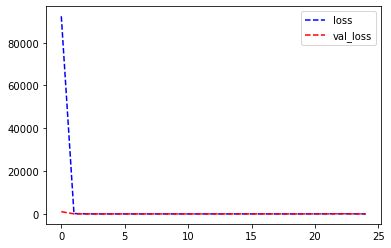

In [104]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 2000, activation = 'relu', input_shape = (1000,)),
    tf.keras.layers.Dense(units = 1000, activation = 'relu'),
    tf.keras.layers.Dense(units = 500, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss='mse')
model.summary()

history = model.fit(train_X, fam_conti_train_Y, epochs = 25, batch_size = 10, validation_split = 0.25)

model.evaluate(test_X, fam_conti_test_Y)
pred_Y = model.predict(test_X)

plt.plot(fam_conti_test_Y, pred_Y, 'b.')
LeastSquareMethod(fam_conti_test_Y, pred_Y)
plt.plot([min(fam_conti_test_Y), max(fam_conti_test_Y)], [min(fam_conti_test_Y), max(fam_conti_test_Y)], ls='--', c='.3')
plt.xlabel("test_Y")
plt.ylabel("pred_Y")

plt.figure()
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.legend()

C:\Users\ghdtk\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
23/23 [==============================] - 0s 6ms/step - loss: 1.9289 - val_loss: 1.1879
Epoch 2/25
23/23 [==============================] - 0s 2ms/step - loss: 0.9720 - val_loss: 0.9064
Epoch 3/25
23/23 [==============================] - 0s 1ms/step - loss: 0.8672 - val_loss: 1.0333
Epoch 4/25
23/23 [==============================] - 0s 1ms/step - loss: 0.6992 - val_loss: 0.7990
Epoch 5/25
23/23 [==============================] - 0s 1ms/step - loss: 0.5546 - val_loss: 0.8564
Epoch 6/25
23/23 [==============================] - 0s 1ms/step - loss: 0.4834 - val_loss: 0.7547
Epoch 7/25
23/23 [==============================] - 0s 1ms/step - loss: 0.3259 - val_loss: 0.9713
Epoch 8/25
23/23 [==============================] - 0s 2ms/step - loss: 0.2853 - val_loss: 0.8671
Epoch 9/25
23/23 [==============================] - 0s 1ms/step - loss: 0.2651 - val_loss: 1.8719
Epoch 10/25
23/23 [==============================] - 0s 1ms/step - loss: 0.4595 - val_loss: 0.6960
Epoch 11/25
23/23 [

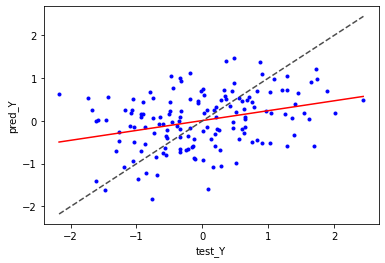

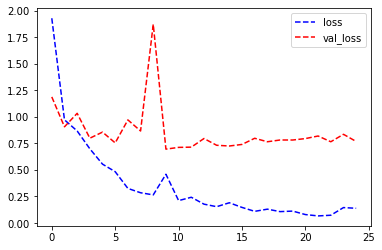

In [12]:
def getSlope(X, Y):
    x_bar = sum(X) / len(X)
    y_bar = sum(Y) / len(Y)
    
    a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
    return a

mydict = {}
for i in range(1000):
    snp_i = pd.DataFrame(train_X).iloc[:, i]
    mydict[i] = abs(getSlope(snp_i, fam_conti_train_Y))


MostSNP = sorted(mydict.items(), key = lambda item: item[1], reverse = True)
selected_SNP = pd.DataFrame()
for i in range(500):
    selected_SNP['SNP' + str(MostSNP[i][0]+1)] = pd.DataFrame(train_X).iloc[:, MostSNP[i][0]]

selected_SNP = np.array(selected_SNP)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = (500,)),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss='mse')

history = model.fit(selected_SNP, fam_conti_train_Y, epochs = 25, batch_size = 10, validation_split = 0.25)

selected_test_SNP = pd.DataFrame()
for i in range(500):
    selected_test_SNP['SNP' + str(MostSNP[i][0]+1)] = pd.DataFrame(test_X).iloc[:, MostSNP[i][0]]
selected_test_SNP = np.array(selected_test_SNP)

model.evaluate(selected_test_SNP, fam_conti_test_Y)
pred_Y = model.predict(selected_test_SNP)

plt.plot(fam_conti_test_Y, pred_Y, 'b.')
LeastSquareMethod(fam_conti_test_Y, pred_Y)
plt.plot([min(fam_conti_test_Y), max(fam_conti_test_Y)], [min(fam_conti_test_Y), max(fam_conti_test_Y)], ls='--', c='.3')
plt.xlabel("test_Y")
plt.ylabel("pred_Y")

plt.figure()
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.legend()

slope :  0.12415061213778722 intercept :  0.012352808128927948


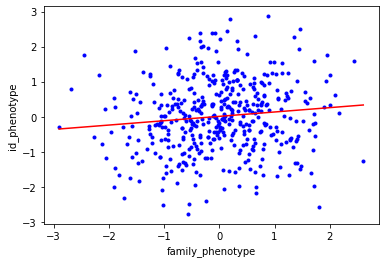

In [14]:
x = fam_conti_train_Y
x = x.tolist()
x.extend(fam_conti_test_Y.tolist())

y = id_conti_train_Y
y = y.tolist()
y.extend(id_conti_test_Y.tolist())

plt.xlabel("family_phenotype")
plt.ylabel("id_phenotype")
plt.plot(x, y, 'b.')
LeastSquareMethod(x, y)

C:\Users\ghdtk\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                64064     
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 17        
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
23/23 [==============================] - 1s 11ms/step - loss: 8.2606 - val_loss: 1.1602
Epoch 2/25
23/23 [==============================] - 0s 2ms/step - loss: 1.3092 - val_loss: 1.0918
Epoch 3/25
23/23 [==============================] 

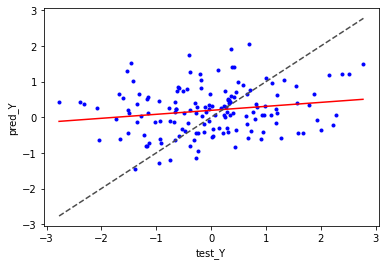

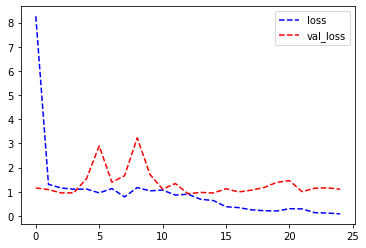

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = (1000,)),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss='mse')
model.summary()

history = model.fit(train_X, id_conti_train_Y, epochs = 25, batch_size = 10, validation_split = 0.25)

model.evaluate(test_X, id_conti_test_Y)
pred_Y = model.predict(test_X)

plt.plot(id_conti_test_Y, pred_Y, 'b.')
LeastSquareMethod(id_conti_test_Y, pred_Y)
plt.plot([min(id_conti_test_Y), max(id_conti_test_Y)], [min(id_conti_test_Y), max(id_conti_test_Y)], ls='--', c='.3')
plt.xlabel("test_Y")
plt.ylabel("pred_Y")

plt.figure()
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.legend()

C:\Users\ghdtk\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
23/23 [==============================] - 0s 5ms/step - loss: 1.1663 - val_loss: 0.9450
Epoch 2/25
23/23 [==============================] - 0s 1ms/step - loss: 0.9438 - val_loss: 0.8758
Epoch 3/25
23/23 [==============================] - 0s 1ms/step - loss: 0.8287 - val_loss: 0.7729
Epoch 4/25
23/23 [==============================] - 0s 1ms/step - loss: 0.8872 - val_loss: 0.8518
Epoch 5/25
23/23 [==============================] - 0s 1ms/step - loss: 0.7693 - val_loss: 0.7960
Epoch 6/25
23/23 [==============================] - 0s 1ms/step - loss: 0.6850 - val_loss: 0.7493
Epoch 7/25
23/23 [==============================] - 0s 1ms/step - loss: 0.6750 - val_loss: 0.7152
Epoch 8/25
23/23 [==============================] - 0s 1ms/step - loss: 0.6517 - val_loss: 0.7294
Epoch 9/25
23/23 [==============================] - 0s 1ms/step - loss: 0.7027 - val_loss: 0.7219
Epoch 10/25
23/23 [==============================] - 0s 1ms/step - loss: 0.6564 - val_loss: 0.7076
Epoch 11/25
23/23 [

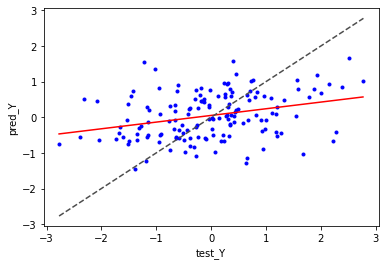

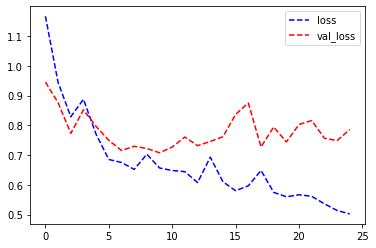

In [25]:
mydict = {}
for i in range(1000):
    snp_i = pd.DataFrame(train_X).iloc[:, i]
    mydict[i] = abs(getSlope(snp_i, id_conti_train_Y))


MostSNP = sorted(mydict.items(), key = lambda item: item[1], reverse = True)
selected_SNP = pd.DataFrame()
for i in range(30):
    selected_SNP['SNP' + str(MostSNP[i][0]+1)] = pd.DataFrame(train_X).iloc[:, MostSNP[i][0]]

selected_SNP = np.array(selected_SNP)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 32, activation = 'relu', input_shape = (30,)),
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss='mse')

history = model.fit(selected_SNP, id_conti_train_Y, epochs = 25, batch_size = 10, validation_split = 0.25)

selected_test_SNP = pd.DataFrame()
for i in range(30):
    selected_test_SNP['SNP' + str(MostSNP[i][0]+1)] = pd.DataFrame(test_X).iloc[:, MostSNP[i][0]]
selected_test_SNP = np.array(selected_test_SNP)

model.evaluate(selected_test_SNP, id_conti_test_Y)
pred_Y = model.predict(selected_test_SNP)

plt.plot(id_conti_test_Y, pred_Y, 'b.')
LeastSquareMethod(id_conti_test_Y, pred_Y)
plt.plot([min(id_conti_test_Y), max(id_conti_test_Y)], [min(id_conti_test_Y), max(id_conti_test_Y)], ls='--', c='.3')
plt.xlabel("test_Y")
plt.ylabel("pred_Y")

plt.figure()
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.legend()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 64)                64064     
_________________________________________________________________
dense_149 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_150 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_151 (Dense)            (None, 2)                 34        
Total params: 66,706
Trainable params: 66,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
23/23 [==============================] - 0s 7ms/step - loss: 4.6315 - accuracy: 0.6533 - val_loss: 3.0316 - val_accuracy: 0.1867
Epoch 2/25
23/23 [==============================] - 0s 2ms/step - loss: 0.8848 - accuracy: 0.6844 - val_los

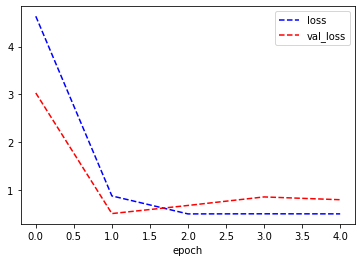

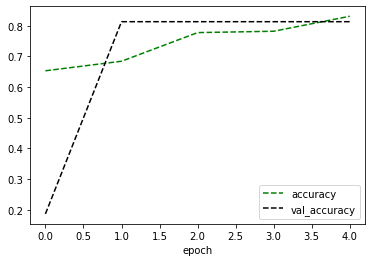

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape=(1000,)),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 2, activation = 'softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

fam_bin_train_Y_cat = tf.keras.utils.to_categorical(fam_bin_train_Y, num_classes = 2)
fam_bin_test_Y_cat = tf.keras.utils.to_categorical(fam_bin_test_Y, num_classes = 2)

history = model.fit(train_X, fam_bin_train_Y_cat, epochs=25, batch_size=10, validation_split = 0.25,
         callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_loss')])

model.evaluate(test_X, fam_bin_test_Y_cat)


plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel("epoch")
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], 'g--', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel("epoch")
plt.legend()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 64)                64064     
_________________________________________________________________
dense_189 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_190 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_191 (Dense)            (None, 2)                 34        
Total params: 66,706
Trainable params: 66,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
23/23 [==============================] - 0s 7ms/step - loss: 2.6983 - accuracy: 0.5956 - val_loss: 0.7156 - val_accuracy: 0.7733
Epoch 2/25
23/23 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7556 - val_los

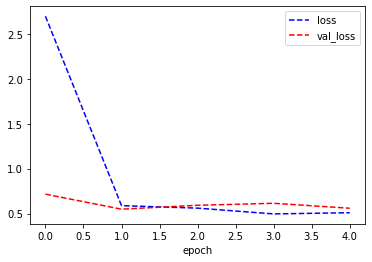

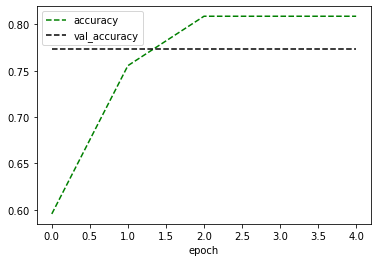

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape=(1000,)),
    tf.keras.layers.Dense(units = 32, activation = 'relu'),
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 2, activation = 'softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

id_bin_train_Y_cat = tf.keras.utils.to_categorical(id_bin_train_Y, num_classes = 2)
id_bin_test_Y_cat = tf.keras.utils.to_categorical(id_bin_test_Y, num_classes = 2)

history = model.fit(train_X, id_bin_train_Y_cat, epochs=25, batch_size=10, validation_split = 0.25,
         callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_loss')])

model.evaluate(test_X, id_bin_test_Y_cat)


plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel("epoch")
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], 'g--', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel("epoch")
plt.legend()

In [91]:
fam_bin = []
fam_bin.extend(fam_bin_train_Y)
fam_bin.extend(fam_bin_test_Y)

id_bin = []
id_bin.extend(id_bin_train_Y)
id_bin.extend(id_bin_test_Y)
bin_df = pd.DataFrame({'family phenotype' : fam_bin, 'id phenotype' : id_bin})
bin_df.groupby('family phenotype').mean()

,id phenotype
family phenotype,
0.0,0.180055
1.0,0.235955


In [92]:
bin_df.groupby('family phenotype').count()

,id phenotype
family phenotype,
0.0,361
1.0,89


In [93]:
bin_df.groupby('id phenotype').count()

,family phenotype
id phenotype,
0.0,364
1.0,86
